# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
Визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [993]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [994]:
N = 5 # put your index here

In [995]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [996]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class M_DBSCAN(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, min_pts=5, eps=0.5):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.min_pts = min_pts
        self.eps = eps
        return
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        self.x_len = x.shape[0]
        visitedArr = np.zeros(self.x_len, dtype=bool)
        self.clasters = np.zeros(self.x_len, dtype=int)
        idClaster = 0
        for i in xrange(self.x_len):
            if  not visitedArr[i]:
                visitedArr[i] = True
                nbrId = np.argwhere(np.power((x - x[i]), 2).sum(axis=-1) < self.eps).reshape(-1)
                if nbrId.shape[0] < self.min_pts:
                    self.clasters[i] = -1          # NOISE
                else:
                    idClaster += 1
                    self.clasters[i] = idClaster
                    while nbrId.shape[0] > 0:
                        curIdNbr = nbrId[0]
                        if not visitedArr[curIdNbr]:
                            visitedArr[curIdNbr] = True
                            nbrId_1 = np.argwhere(
                                        np.power((x - x[curIdNbr]), 2).sum(axis=-1) < self.eps
                                        ).reshape(-1)
                            if nbrId_1.shape[0] >= self.min_pts:
                                nbrId = np.append(nbrId, nbrId_1)
                        if self.clasters[curIdNbr] == 0:
                            self.clasters[curIdNbr] = idClaster                                    
                        nbrId = nbrId[1:]
        return self.clasters
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

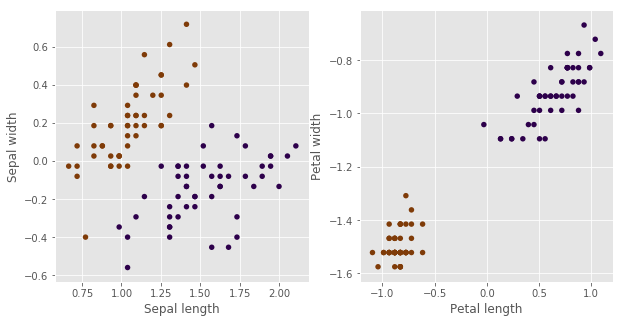

In [997]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

x_iris = (x_iris - x_iris.mean()) / x_iris.std()

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [998]:
pred_iris = M_DBSCAN().fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

In [999]:
%%timeit 
pred_iris = M_DBSCAN().fit_predict(x_iris)

In [1000]:
%%timeit
pred_iris = sc.DBSCAN(eps=0.5, min_samples=5).fit_predict(x_iris)

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [1001]:
## Задание 2
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    res = np.zeros(x.shape[0])
    for i in xrange(x.shape[0]):
        a = np.power(x[y == y[i]] - x[i], 2).sum(axis=-1).mean()
        min_b = np.inf
        for j in np.unique(y):
            if y[i] != j:
                min_b = min(np.power(x[y == j] - x[i], 2).sum(axis=-1).mean(), min_b)
        res[i] = (min_b - a) / max(a, min_b)
    return res.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

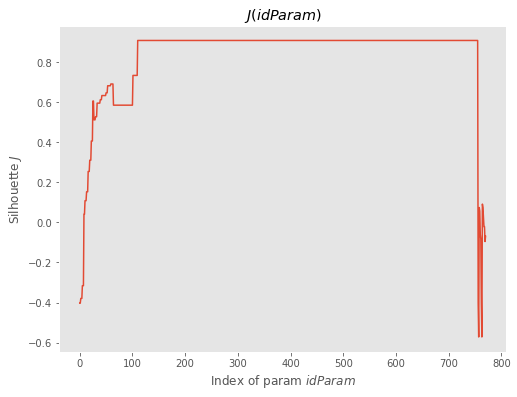

array([ 0.61,  3.  ])

In [1002]:
deltaParams = np.array([1e-3, 1])
startParams = np.array([1e-2, 3])

ks = np.array([np.array([1e-2 + i * 1e-3, 3]) for i in xrange(1000)])
ks = np.append(ks, [np.array([1e-2, 3 + i])for i in xrange(50)]).reshape(-1, 2)
ks = np.append(ks, [startParams + deltaParams * i for i in xrange(1000)]).reshape(-1, 2)
criteria = np.zeros(ks.shape[0])

for i, param in enumerate(ks):
    cls = M_DBSCAN(eps=param[0], min_pts=param[1])
    y = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, y)

ks = ks[~np.isnan(criteria)]
criteria = criteria[~np.isnan(criteria)]
    
pl.figure(figsize=(8, 6))
pl.plot([i for i, _ in enumerate(ks)], criteria)
pl.title("$J(idParam)$")
pl.ylabel("Silhouette $J$")
pl.xlabel("Index of param $idParam$")
pl.grid()
pl.show()

ks[600]

In [1003]:
## Задание 3
df = pd.read_csv('WDIData.csv')

In [1005]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [1006]:
data = df[['Country Name', 'Indicator Code', '2012']]\
        .set_index(['Country Name', 'Indicator Code'])\
        .unstack(level=-1)['2012']

In [1007]:
data = (data - data.mean()) / data.std()

In [1008]:
data = data.fillna(data.mean())

In [1009]:
clearData = data

In [1010]:
clearData.head()

Indicator Code,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,5.652809e-01,-2.329215e-01,-0.277925,0.987333,0.048861,0.205310,-0.141932,-3.203579e-01,-5.294081e-01,...,-1.612272e-16,-3.289852e-16,1.769418e-16,-3.365364e-16,-5.046468e-17,-1.312082e-16,-7.065056e-17,8.074349e-17,7.906134e-17,2.144749e-17
Albania,NaN,2.316695e-17,-1.633694e-01,-0.341607,0.294204,-0.303700,0.035305,0.697972,-3.529736e-01,-1.638528e-01,...,-7.956402e-01,-6.975469e-01,-1.878220e-01,1.365080e+00,6.296713e-01,9.528428e-01,7.457875e-01,4.727405e-01,4.690101e-01,3.508969e-01
Algeria,NaN,4.134938e-02,-2.396775e-01,-0.271873,-0.995209,0.034923,-0.022170,-0.833564,-3.212335e-01,-5.009548e-01,...,-1.612272e-16,-3.289852e-16,1.769418e-16,-3.365364e-16,-5.046468e-17,-1.312082e-16,-7.065056e-17,8.074349e-17,7.906134e-17,2.144749e-17
American Samoa,NaN,2.316695e-17,-1.126313e-17,-0.343683,-0.648340,-0.333990,-0.635704,0.099724,3.291369e-17,7.690640e-01,...,-1.612272e-16,-3.289852e-16,1.769418e-16,-3.365364e-16,-5.046468e-17,-1.312082e-16,-7.065056e-17,8.074349e-17,7.906134e-17,2.144749e-17
Andorra,NaN,2.316695e-17,-1.126313e-17,-0.343656,0.252087,-0.334020,-0.741975,-0.679593,3.291369e-17,-1.599087e-16,...,-1.612272e-16,-3.289852e-16,1.769418e-16,-3.365364e-16,-5.046468e-17,-1.312082e-16,-7.065056e-17,8.074349e-17,7.906134e-17,2.144749e-17


In [1011]:
bound = (data ** 2).sum().quantile(q=0.95)

In [1012]:
clearData = data.loc[:, (data ** 2).sum() >= bound]

In [1013]:
clusters = M_DBSCAN(eps=10, min_pts=2).fit_predict(clearData.values)

In [1014]:
clearData = clearData.loc[clusters != -1, :]

In [1015]:
import sys
reload(sys)
sys.setdefaultencoding('UTF8')

X_embedded = sm.TSNE(n_components=2).fit_transform(clearData.values)

In [1016]:
clusters = clusters[clusters != -1]

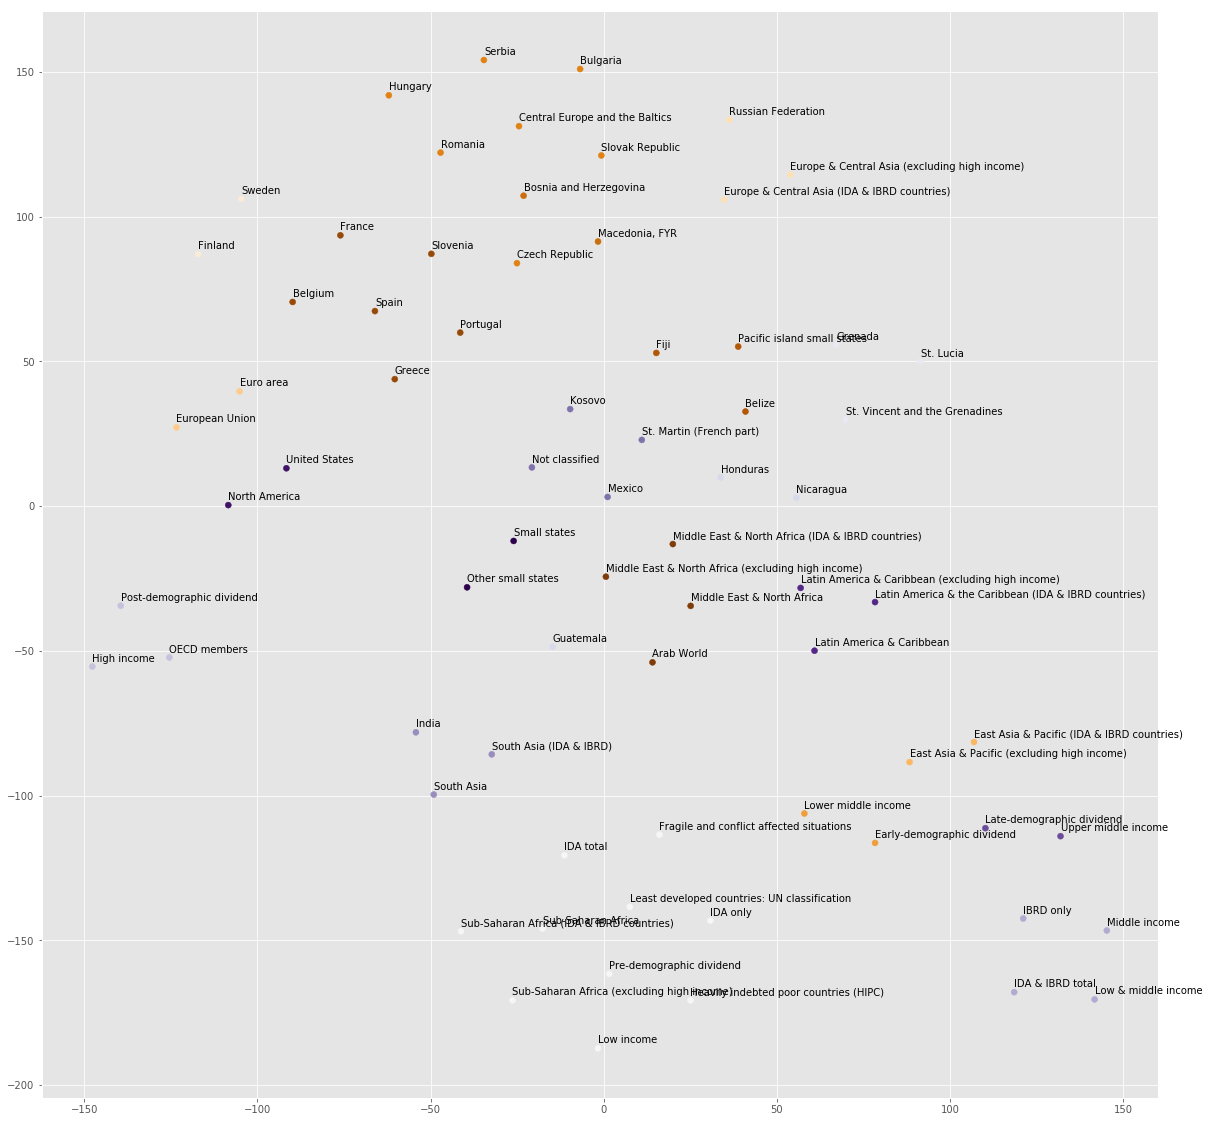

In [1017]:
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clusters, cmap=pl.cm.PuOr)
for i, country in enumerate(clearData.index.values):
    plt.annotate(country, xy=X_embedded[i], xytext=(0, 5), textcoords='offset points', fontsize=10)
plt.show()

## Задание 4

Получили следующие кластеры:
* (Арабский мир, Ближний Восток и Северная Африка, Ближний Восток и Северная Африка (страны МАР и МБРР), Ближний Восток и Северная Африка (за исключением высоких доходов)) --- страны Арабского мира
* (Bulgaria, Central Europe and the Baltics, Czech Republic, Hungary, Romania, Serbia, Slovak Republic) --- страны центральной Европы
* (Belgium, France, Greece, Portugal, Slovenia, Spain) --- с натяжкой можно отнести к Средеземноморским странам

и т.д.


Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.